<a href="https://colab.research.google.com/github/BAKARWA-kh/workshop04/blob/main/pr%C3%A9diction_de_model_avec_bestsubsets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importation des données

In [12]:
# Installation de readxl dans Google Colab
install.packages("readxl")
library(readxl)
# Nommées les données
# Pour commencer, il faut importer les données sur Google Collab, puis copier le chemin d'accès
data_model =read_excel("/data.xlsx")



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Quelques codes pour comprendre la structure des données

In [13]:
# afficher les premières lignes de tableau
head(data_model)
# afficher la structure génerale
str(data_model)
#type de l'objet
class(data_model)
#type interne des élements
typeof(data_model)
#noms des colones et lignes
colnames(data_model)
rownames(data_model)


Semestre,MT,RG,PRIX,BR,INV,PUB,FV,TPUB,VENTES
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,398,138,56,12,50,77,229,98,5540
2,369,118,59,9,17,89,177,225,5439
3,268,129,57,29,89,51,166,263,4290
4,484,111,58,13,107,40,258,321,5502
5,394,146,59,13,143,52,209,407,4872
6,332,140,60,11,61,21,180,247,4708


tibble [38 × 10] (S3: tbl_df/tbl/data.frame)
 $ Semestre: num [1:38] 1 2 3 4 5 6 7 8 9 10 ...
 $ MT      : num [1:38] 398 369 268 484 394 332 336 383 285 277 ...
 $ RG      : num [1:38] 138 118 129 111 146 140 136 104 105 135 ...
 $ PRIX    : num [1:38] 56 59 57 58 59 60 60 60 63 62 ...
 $ BR      : num [1:38] 12 9 29 13 13 11 25 21 8 11 ...
 $ INV     : num [1:38] 50 17 89 107 143 61 -30 -45 -28 76 ...
 $ PUB     : num [1:38] 77 89 51 40 52 21 40 32 12 68 ...
 $ FV      : num [1:38] 229 177 166 258 209 180 213 201 176 175 ...
 $ TPUB    : num [1:38] 98 225 263 321 407 247 328 298 218 410 ...
 $ VENTES  : num [1:38] 5540 5439 4290 5502 4872 ...


[1] "tbl_df"     "tbl"        "data.frame"

[1] "list"

[1] "Semestre" "MT"       "RG"       "PRIX"     "BR"       "INV"     
 [7] "PUB"      "FV"       "TPUB"     "VENTES"

[1] "1"  "2"  "3"  "4"  "5"  "6"  "7"  "8"  "9"  "10" "11" "12" "13" "14" "15"
[16] "16" "17" "18" "19" "20" "21" "22" "23" "24" "25" "26" "27" "28" "29" "30"
[31] "31" "32" "33" "34" "35" "36" "37" "38"

On a deux méthodes qui peut utiliser pour la sélection de modéles dans R car le nombre des variables est inférieur a 50


*   sélection des meilleur sous-ensembles
 ( best-subsets-regression)
*   Sélection par étapes
( stepwise-regression )



# Sélection des meilleur sous-ensembles (best-subsets-regression)

In [11]:
# installation des packages
install.packages("leaps") # Pour la selection de variable dans le modéles de régression
library(leaps)
set.seed(123) # fixer la graine du génerateur de nombres aléatoires

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [15]:
# le modèle qui contient toutes les variables
bestsub_model <- regsubsets ( VENTES ~ MT + RG + PRIX + BR +INV + PUB +FV + TPUB , data = data_model , nvmax = 8 )
#  description de modèle
summary(bestsub_model)

Subset selection object
Call: regsubsets.formula(VENTES ~ MT + RG + PRIX + BR + INV + PUB + 
    FV + TPUB, data = data_model, nvmax = 8)
8 Variables  (and intercept)
     Forced in Forced out
MT       FALSE      FALSE
RG       FALSE      FALSE
PRIX     FALSE      FALSE
BR       FALSE      FALSE
INV      FALSE      FALSE
PUB      FALSE      FALSE
FV       FALSE      FALSE
TPUB     FALSE      FALSE
1 subsets of each size up to 8
Selection Algorithm: exhaustive
         MT  RG  PRIX BR  INV PUB FV  TPUB
1  ( 1 ) "*" " " " "  " " " " " " " " " " 
2  ( 1 ) "*" " " " "  " " " " "*" " " " " 
3  ( 1 ) "*" " " " "  " " "*" "*" " " " " 
4  ( 1 ) "*" " " "*"  " " "*" "*" " " " " 
5  ( 1 ) "*" "*" "*"  " " "*" "*" " " " " 
6  ( 1 ) "*" "*" "*"  " " "*" "*" "*" " " 
7  ( 1 ) "*" "*" "*"  "*" "*" "*" "*" " " 
8  ( 1 ) "*" "*" "*"  "*" "*" "*" "*" "*" 

In [54]:
# performance de modele
cbind (
  cp = summary(bestsub_model)$cp, # Critère de Mallows (CP)
  r2 = summary(bestsub_model)$rsq,  # Coefficient de détermination (R²)
  adj_r2 = summary(bestsub_model)$adjr2, # R² ajusté
  BIC = summary(bestsub_model)$bic # Critère d'information bayésien (BIC)
)

cp,r2,adj_r2,BIC
35.9455342,0.5195676,0.5062222,-20.58144
10.7563945,0.7063207,0.6895390,-35.64738
2.5446890,0.7764614,0.7567375,-42.38017
0.7694286,0.8023924,0.7784400,-43.42802
2.4966798,0.8042659,0.7736824,-40.15241
4.3178929,0.8054939,0.7678475,-36.75398
6.0416418,0.8073914,0.7624494,-33.48892
8.0004351,0.8076744,0.7546191,-29.90721


In [67]:
predict.regsubsets <- function ( objects , newdata , id , ...){
  form <- as.formula(objects$call[[2]]) # Récupérer la formule du modèle
  mat <- model.matrix( form , newdata) # Créer la matrice des prédicteurs
  coefi <- coef(objects , id = id )  # Extraire les coefficients du modèle sélectionné
  mat[, names (coefi),drop = FALSE]%*% coefi   # Calculer la prédiction (produit matriciel)
}

En utilse $call pour


In [60]:
bestsub_model$call[[4]]  # "nvmax = 8" (le nombre max de variables)
bestsub_model$call[[3]]  # "data = df" (les données)
bestsub_model$call[[2]]  # "y ~ x1 + x2 + x3" (la formule)
bestsub_model$call[[1]]  # "regsubsets" (le nom de la fonction)

[1] 8

data_model

VENTES ~ .

regsubsets.formula

## Utilisation de regsubsets() avec la Validation Croisée




In [99]:
jk.errors <- matrix(NA , 38, 8) #Cette matrice stockera les erreurs quadratiques pour chaque observation et chaque modèle.
#On fait une boucle sur chaque observation k, qui sera temporairement exclue pour tester la performance du modèle.
for (k in 1:38) {
   best.model.cv <- regsubsets ( VENTES ~ MT + RG + PRIX + BR +INV + PUB +FV + TPUB , data = (data_model [-k, ]) , #Cela simule l'effet de laisser une observation de côté pour la validation
    nvmax = 8 )
    #On teste tous les modèles, en sélectionnant de 1 à 8 variables.
   for ( i in 1:8) {
    pred <- predict ( best.model.cv , data_model [k,], id = i )
    jk.errors [k,i] <- (data_model$VENTES[k]- pred )^2
   }
}


# Affichage du modèle optimal

In [83]:
best_model <- which.min(mean_errors)
cat("Le meilleur modèle sélectionne", best_model, "variables avec une erreur moyenne de", mean_errors[best_model], "\n")


Le meilleur modèle sélectionne 4 variables avec une erreur moyenne de 66726.31 


# Tracer l'évolution de l'erreur quadratique moyenne en fonction du nombre de variables

In [109]:
# Calculer l'erreur quadratique moyenne (MSE) pour chaque modèle (1 à 8 variables)
mse_model <- apply ( jk_errors , 2 , mean )
print(mse_model)

[1] 137222.00  86947.60  81847.01  66726.31  80642.61  88458.50  87787.55
[8]  91406.61


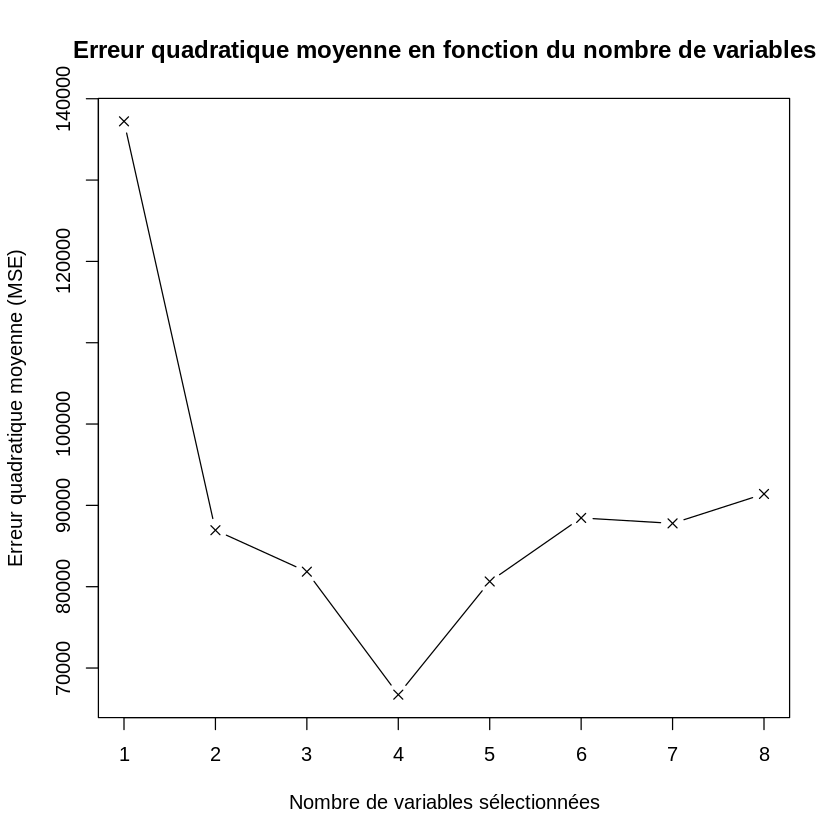

In [106]:
plot(mse_model, pch = 4 ,
 type = "b" ,
 main="Erreur quadratique moyenne en fonction du nombre de variables",
  xlab = "Nombre de variables sélectionnées" ,
   ylab = "Erreur quadratique moyenne (MSE)")

# Tracer la distribution des l'erreur quadratiques

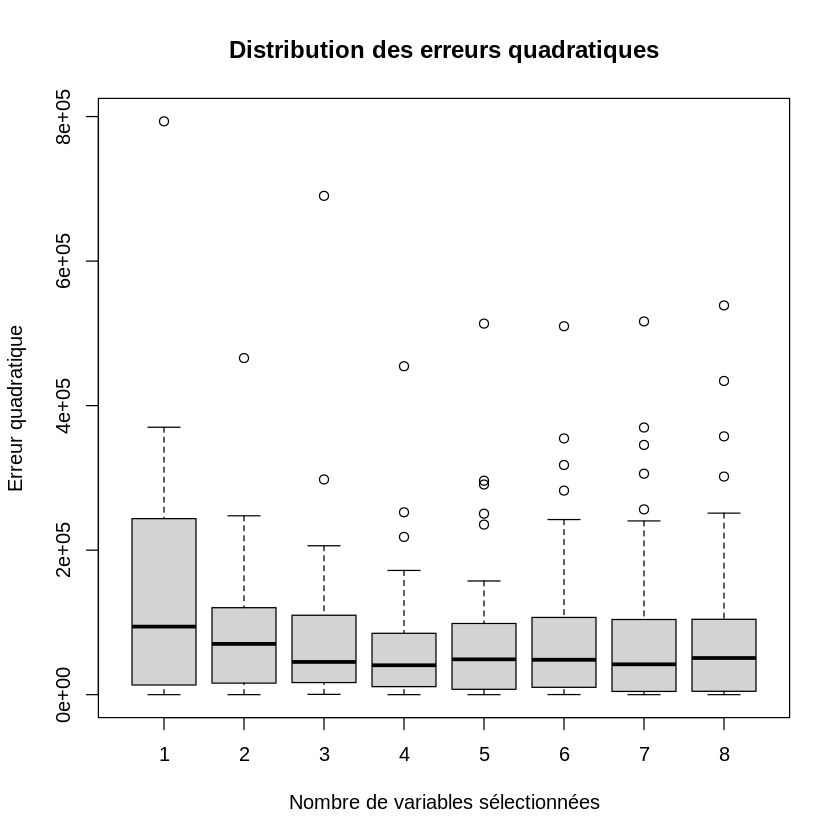

In [93]:
boxplot(jk.errors ,main = "Distribution des erreurs quadratiques",
        xlab = "Nombre de variables sélectionnées", ylab = "Erreur quadratique")


In [71]:
which.min(mse_model)

[1] 4

In [72]:
best_model_size <- 4
best_cofs <- coef(bestsub_model , id = best_model_size)
print(best_cofs)

(Intercept)    Semestre          MT         INV         PUB 
2560.215738   -9.321243    5.218351    1.963164    8.259711 


In [104]:
new_data <- data.frame(MT = 755, PRIX = 150, INV = 93, PUB = 508)

# Construire la prédiction avec produit matriciel
X <- c(1, new_data$MT, new_data$PRIX, new_data$INV, new_data$PUB)
prediction <- sum(best_cofs * X)

cat("Prédiction pour les ventes sera:", prediction)



Prédiction pour les ventes sera: 683.9371